[3.05931973 1.45754553]


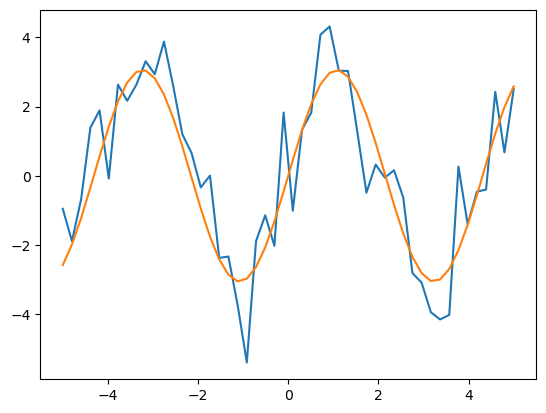

In [1]:
import numpy as np
#import plotly.express as px
#from plotly.offline import plot
from scipy import optimize
import matplotlib.pyplot as plt


def test_func(x, a, b):
    return a * np.sin(b * x)

# Seed the random number generator for reproducibility
np.random.seed(0)

#Generate some noisy data
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# Fit a sine wave
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

# And plot the fitted sine wave on top of the noisy data
print(params)
plt.figure()
plt.plot(x_data,y_data)
plt.plot(x_data,test_func(x_data,params[0],params[1]))


[-9.44822945 -2.78055343] [-9.52105406 -2.78303281]
0.036669656372070314
[1.48545485e-04 1.56101969e-05]


C:\Users\logan\AppData\Local\Temp\ipykernel_26132\1894463720.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, rawData = wavfile.read(filename)


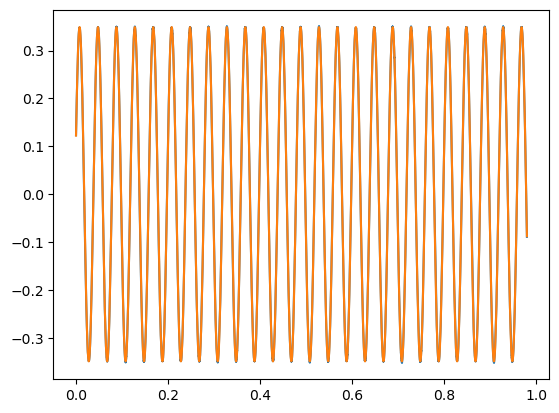

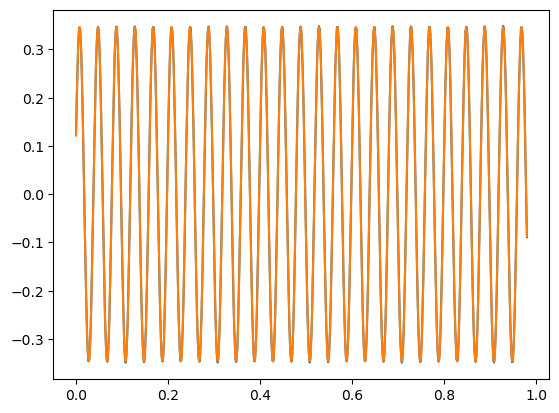

In [2]:
from scipy.io import wavfile
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def importWAV(filename):
    samplerate, rawData = wavfile.read(filename)
    
    time = np.linspace(0, rawData.shape[0]/samplerate, rawData.shape[0])   
    
    data = {'left':rawData[:, 0],'right':rawData[:, 1]}
    return time,data

time,data = importWAV('40mV_25Hz.wav')

Rdata = data['right']
Ldata = data['left']

def wave(t, a, b):
    return a * 36.67E-3* np.sin(25 * (2*np.pi) * t + b)

# Fit a sine wave
Rparams, Rparams_covariance = optimize.curve_fit(wave, time, Rdata,
                                               p0=[2, 2])
Lparams, Lparams_covariance = optimize.curve_fit(wave, time, Ldata,
                                               p0=[2, 2])

# And plot the fitted sine wave on top of the noisy data
print(Lparams, Rparams)
plt.figure()
plt.plot(time, Rdata)
plt.plot(time, wave(time, Rparams[0], Rparams[1]))
plt.figure()
plt.plot(time, Ldata)
plt.plot(time, wave(time, Lparams[0], Rparams[1]))
print(max(data['right']) * 1.0465 / 10)
print(np.sqrt(np.diag(Rparams_covariance)))